<a href="https://colab.research.google.com/github/amanjain487/tsai-eva6/blob/main/Assignments/S11/Train%20YOLO%20on%20Custom%20Dataset/Train_YOLOv3_on_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install YOLO v3 Package by TSAi

In [89]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 12.71 MiB/s, done.
Resolving deltas: 100% (7/7), done.


# Mount Drive

In [90]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [92]:
cd gdrive/MyDrive/YoloV3

[Errno 2] No such file or directory: 'gdrive/MyDrive/YoloV3'
/content/gdrive/MyDrive/YoloV3


In [93]:
ls

 cfg/        models.py      runs/     'ubdivisions=1'      weights/
 data/       out_out/       test.py    utils/              YoloV3/
 detect.py   __pycache__/   ting       video_output/
 img/        results.txt    train.py   vim.exe.stackdump


# Train Model

In [94]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 265 --resume

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=265, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-22 19:46:56.957626: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (7 found, 0 missing, 0 empty, 0 duplicate, for 3324 images):   0% 7/3324 [00:02<23:32,  2.35it/s]^C


# Process Images and draw Bounding Boxes

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

# Example Output

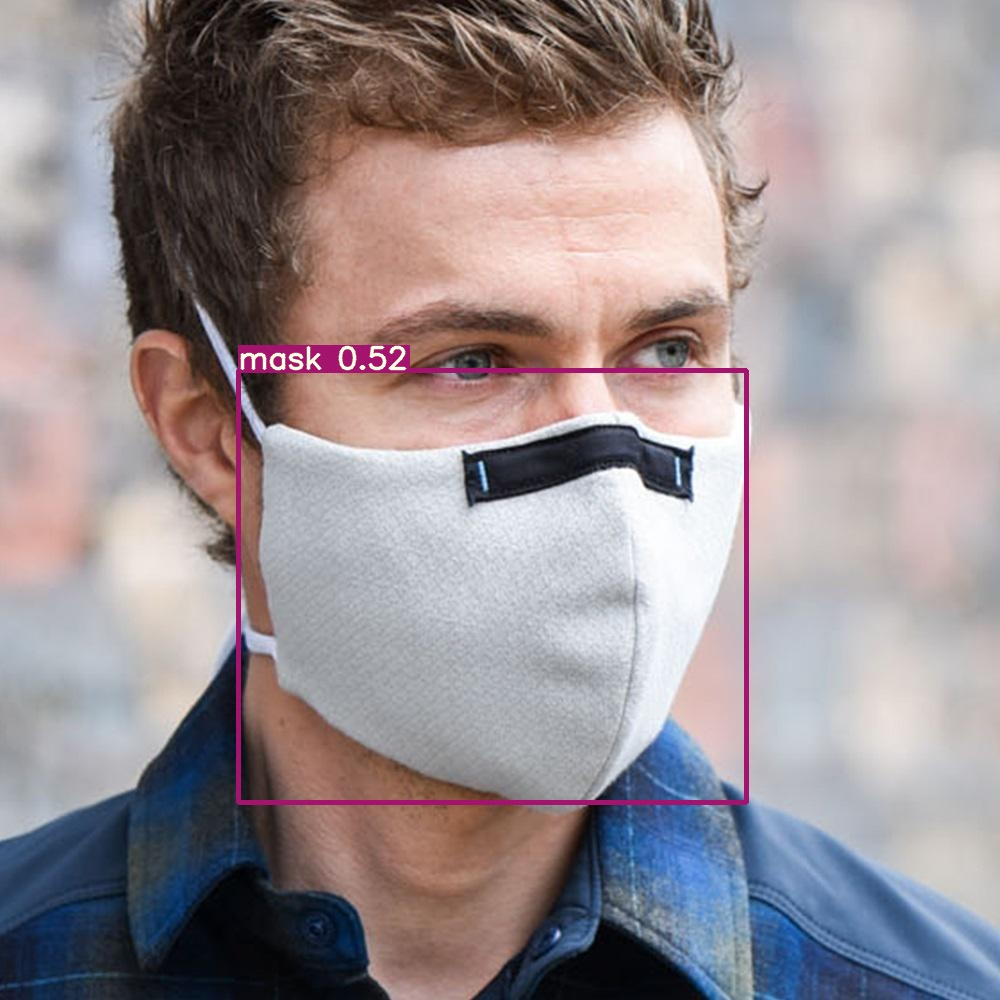

In [96]:

Image(filename='out_out/https3A2F2Fspecials-images.forbesimg.com2Fimageserve2F5f24a25bf9c9ba4b7acb18962F0x0.jpg', width=600)



# Draw Bounding Boxes in Frames extracted from Video

In [97]:
!python detect.py --conf-thres 0.3 --source img --output video_output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='video_output', save_txt=False, source='img', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/726 img/output000001.png: 320x512 Done. (0.016s)
image 2/726 img/output000002.png: 320x512 Done. (0.016s)
image 3/726